In [1]:
import matplotlib.pyplot as plt
import anndata as ad

from pyhere import here

data_path = here("artifacts/v2/cytodata.h5ad")

In [2]:
cyto_adata = ad.read_h5ad(data_path)

In [3]:
cyto_adata.obs.head()

,ct_name,ct_id,label,subject_id
subject_0_cell_0,ct_0,0,control,0
subject_0_cell_1,ct_0,0,control,0
subject_0_cell_2,ct_0,0,control,0
subject_0_cell_3,ct_0,0,control,0
subject_0_cell_4,ct_0,0,control,0


In [4]:
cyto_adata.obs.index

Index(['subject_0_cell_0', 'subject_0_cell_1', 'subject_0_cell_2',
       'subject_0_cell_3', 'subject_0_cell_4', 'subject_0_cell_5',
       'subject_0_cell_6', 'subject_0_cell_7', 'subject_0_cell_8',
       'subject_0_cell_9',
       ...
       'subject_59_cell_9990', 'subject_59_cell_9991', 'subject_59_cell_9992',
       'subject_59_cell_9993', 'subject_59_cell_9994', 'subject_59_cell_9995',
       'subject_59_cell_9996', 'subject_59_cell_9997', 'subject_59_cell_9998',
       'subject_59_cell_9999'],
      dtype='object', length=600000)

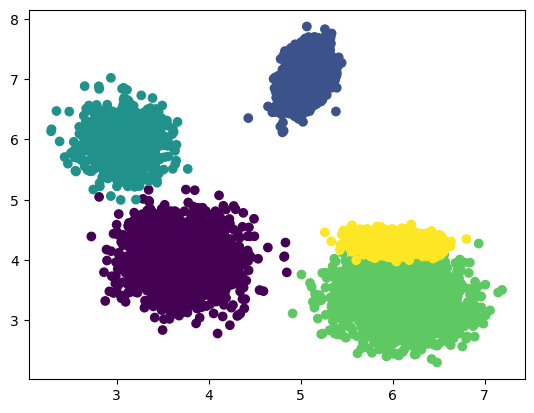

In [5]:

from sklearn.preprocessing import LabelEncoder

sample = cyto_adata[cyto_adata.obs["subject_id"] == 50]
ct_labels = LabelEncoder().fit_transform(sample.obs["ct_name"])

plt.scatter(sample.X[:, 0], sample.X[:, 7], c=ct_labels)

# Marker Distributions

<Axes: xlabel='value', ylabel='variable'>

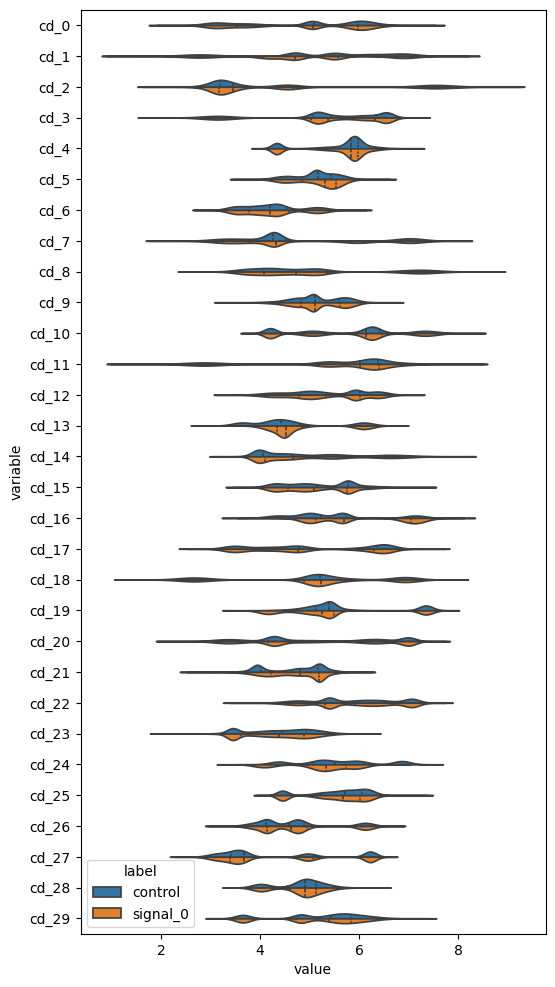

In [7]:
from cytodatagen.utils.adata import adata_to_df
import seaborn as sns
import pandas as pd

from cytodatagen.utils.plotting import plot_marker_dists


plot_marker_dists(cyto_adata)

## Cell Type Distributions

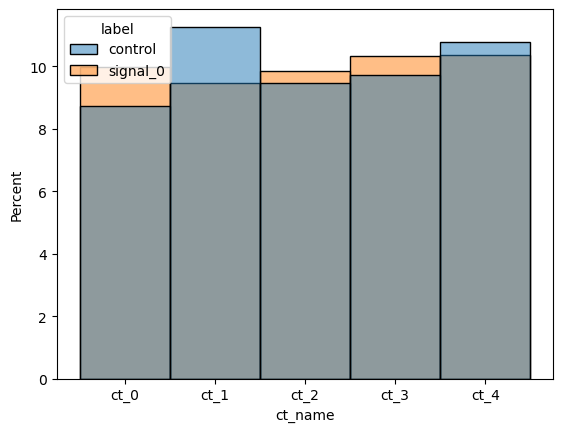

In [8]:
from cytodatagen.utils.plotting import plot_ct_dists

plot_ct_dists(cyto_adata)

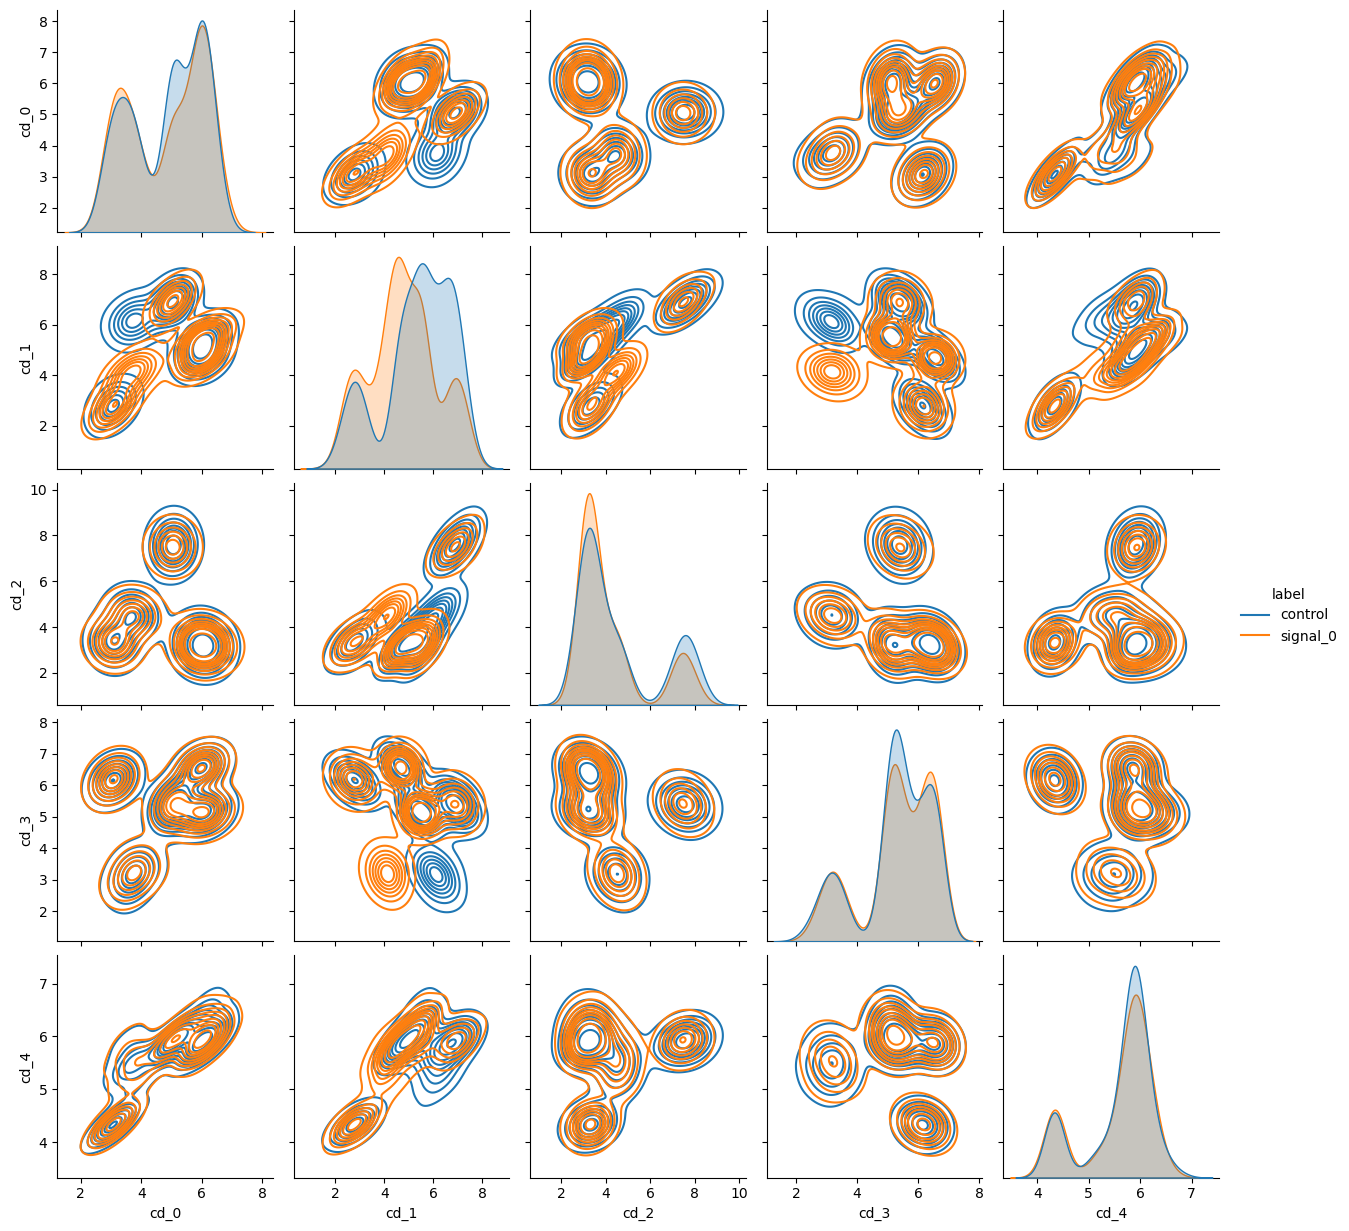

In [12]:
import pandas as pd
import seaborn as sns

from cytodatagen.utils.plotting import plot_marker_pairplot

markers = cyto_adata.var_names[:5].to_list()

obs = cyto_adata.obs.sample(1_000, random_state=19)
sub_adata = cyto_adata[obs.index, markers]
df = sub_adata.to_df()
df["label"] = sub_adata.obs["label"]

plot_marker_pairplot(sub_adata, markers=markers, kind="kde")
#sns.pairplot(df, hue="label")

# t-SNE Embedding

,ct_name,ct_id,label,subject_id,tsne_1,tsne_2
subject_9_cell_1969,ct_0,0,control,9,6.448025,-19.069660
subject_10_cell_742,ct_0,0,control,10,0.293928,-26.085047
subject_28_cell_9281,ct_4,4,control,28,-40.489399,13.584929
subject_10_cell_9305,ct_4,4,control,10,-53.590443,-2.726305
subject_30_cell_5949,ct_3,3,signal_0,30,1.867589,-52.263702
...,...,...,...,...,...,...
subject_14_cell_6716,ct_3,3,control,14,-45.400936,-33.455040
subject_58_cell_7900,ct_4,4,signal_0,58,-53.329533,5.671457
subject_35_cell_7034,ct_3,3,signal_0,35,-2.451674,-62.408241
subject_10_cell_8853,ct_4,4,control,10,-25.205568,19.260893


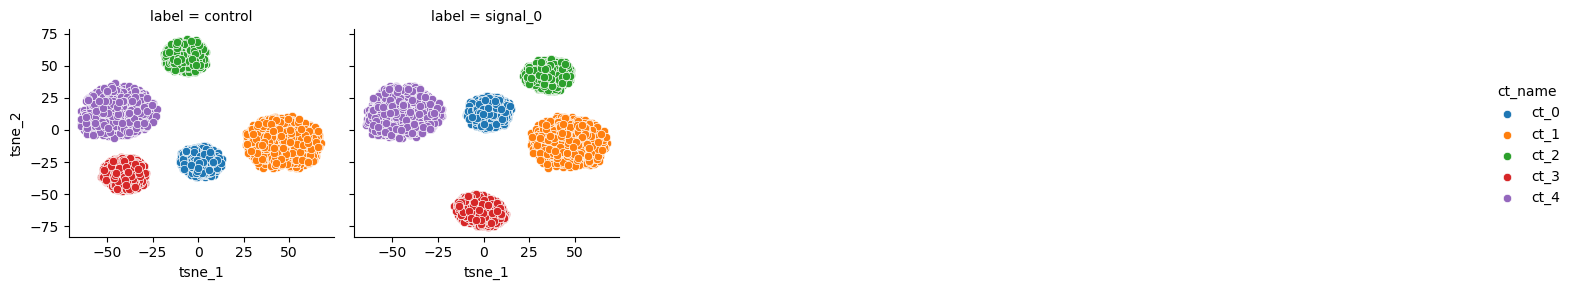

In [ ]:
from cytodatagen.utils.plotting import plot_shared_tsne_grid

plot_shared_tsne_grid(cyto_adata, col="label", hue = "ct_name", col_wrap=2, n_jobs=8)